In [1]:
import torch
from torch import nn

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [3]:
!nvidia-smi

Tue Aug  5 17:44:00 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 575.64.03              Driver Version: 575.64.03      CUDA Version: 12.9     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce MX350           Off |   00000000:01:00.0 Off |                  N/A |
| N/A   60C    P5            N/A  /   14W |       5MiB /   2048MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [4]:
#get the data
#here we use the food 101 dataset
import requests
import zipfile
from pathlib import Path

data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

if image_path.is_dir():
    print("Data already downloaded.")
else:
    print("Downloading data...")
    image_path.mkdir(parents=True, exist_ok=True)

Data already downloaded.


In [5]:
#becoming one with the data(data preperation and data exploration)
import os
def walk_through_dir(dir_path):
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


In [6]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'.
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'.
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'.
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'.
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'.
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'.
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'.


In [7]:
train_dir = image_path / "train"
test_dir = image_path / "test"
test_dir,train_dir

(PosixPath('data/pizza_steak_sushi/test'),
 PosixPath('data/pizza_steak_sushi/train'))

Image class: sushi
sushi
Image size: (382, 512)
Image mode: RGB
512 382


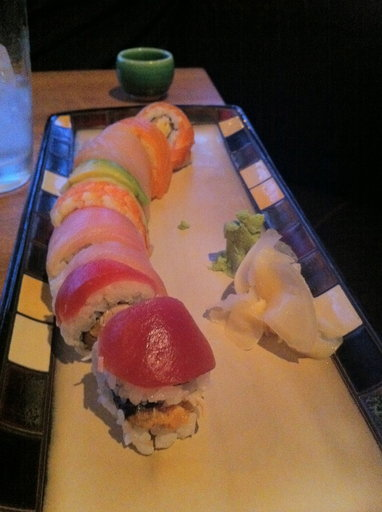

In [8]:
#visalize the image(get all image path and pick random image and get image class name all this using pillow)
from PIL import Image
import random
#set seed
# random.seed(42)
#get all img path

image_path_list  = list(image_path.glob("*/*/*.jpg"))
rand_img_path = random.choice(image_path_list)
rand_img_path

#get name of directory
image_class =  rand_img_path.parent.name
print(f"Image class: {image_class}")

#open image
img = Image.open(rand_img_path)
print(image_class)
print(f"Image size: {img.size}")
print(f"Image mode: {img.mode}")
print(img.height, img.width)
img

(np.float64(-0.5), np.float64(381.5), np.float64(511.5), np.float64(-0.5))

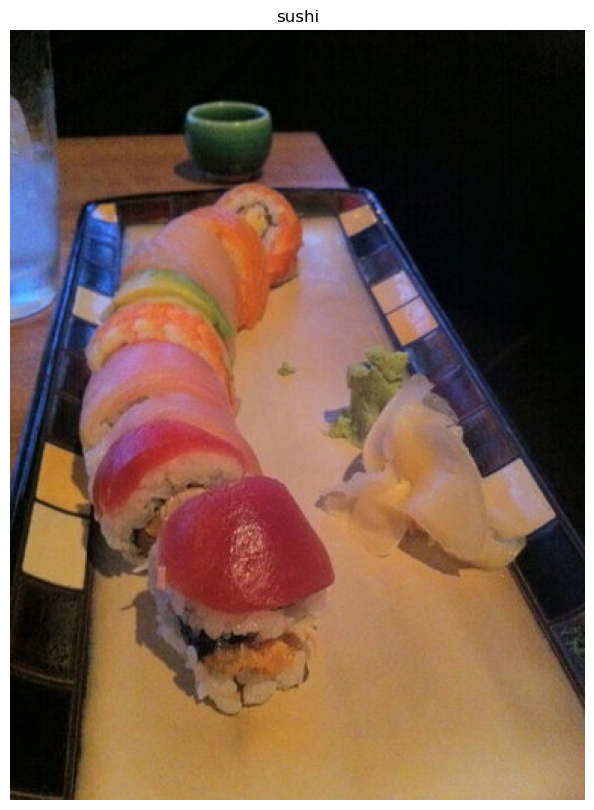

In [9]:
#try to visualize with matplotlib
import numpy as np
import matplotlib.pyplot as plt
img_array = np.asarray(img)
fig = plt.figure(figsize=(10, 10))
plt.imshow(img_array)
plt.title(image_class)
plt.axis(False)


In [10]:
img_array#now our image is in numerical format

array([[[  5,   7,   2],
        [  2,   4,   0],
        [  4,   6,   1],
        ...,
        [ 12,  12,  10],
        [ 13,  13,  11],
        [ 13,  13,  11]],

       [[  4,   6,   1],
        [  3,   5,   0],
        [  4,   6,   1],
        ...,
        [ 15,  15,  13],
        [ 17,  17,  15],
        [ 16,  16,  14]],

       [[  5,   7,   2],
        [  7,   9,   4],
        [  7,   9,   4],
        ...,
        [ 16,  16,  14],
        [ 17,  17,  15],
        [ 16,  16,  14]],

       ...,

       [[ 41,  28,  11],
        [ 38,  25,   8],
        [ 34,  21,   4],
        ...,
        [165, 132,  97],
        [160, 130,  94],
        [160, 130,  94]],

       [[ 39,  28,  10],
        [ 38,  27,   9],
        [ 34,  23,   5],
        ...,
        [163, 130,  95],
        [159, 131,  94],
        [161, 133,  96]],

       [[ 60,  51,  34],
        [ 55,  46,  29],
        [ 44,  35,  18],
        ...,
        [158, 128,  90],
        [159, 131,  92],
        [163, 135,  96]]

In [11]:
#we convert one pic into numbers but we need to convert all images into numbers
##transforming data(turn data into tensors)
from torchvision import transforms,datasets
from torch.utils.data import DataLoader

In [12]:
#tranform data using torchvision.dataset
data_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),  # Resize images to 224x224
    transforms.RandomHorizontalFlip(p=0.5),  # Randomly flip images horizontally    
    transforms.ToTensor(),  # Convert images to PyTorch tensors
])

In [13]:
data_transform(img).shape,data_transform(img),data_transform(img).dtype#still we converting one image into tensor

(torch.Size([3, 64, 64]),
 tensor([[[0.0510, 0.0510, 0.0471,  ..., 0.0549, 0.0471, 0.0353],
          [0.0431, 0.0431, 0.0431,  ..., 0.0588, 0.0549, 0.0392],
          [0.0353, 0.0353, 0.0353,  ..., 0.0627, 0.0588, 0.0471],
          ...,
          [0.6510, 0.6667, 0.6824,  ..., 0.0157, 0.0157, 0.0157],
          [0.6627, 0.6784, 0.6980,  ..., 0.0235, 0.0314, 0.0392],
          [0.6549, 0.6706, 0.6941,  ..., 0.1333, 0.1490, 0.1647]],
 
         [[0.0510, 0.0510, 0.0471,  ..., 0.0627, 0.0549, 0.0392],
          [0.0431, 0.0431, 0.0431,  ..., 0.0667, 0.0627, 0.0471],
          [0.0392, 0.0353, 0.0353,  ..., 0.0745, 0.0667, 0.0549],
          ...,
          [0.5255, 0.5412, 0.5647,  ..., 0.0196, 0.0157, 0.0157],
          [0.5373, 0.5529, 0.5686,  ..., 0.0275, 0.0314, 0.0353],
          [0.5255, 0.5412, 0.5608,  ..., 0.1020, 0.1137, 0.1255]],
 
         [[0.0431, 0.0431, 0.0392,  ..., 0.0431, 0.0353, 0.0235],
          [0.0353, 0.0353, 0.0314,  ..., 0.0431, 0.0431, 0.0314],
          [0.0

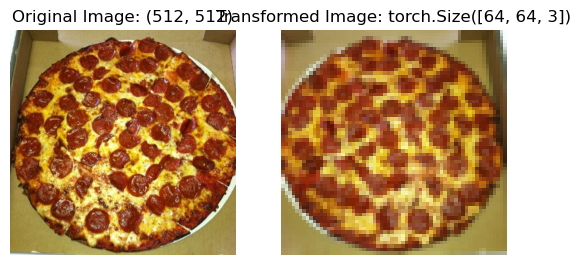

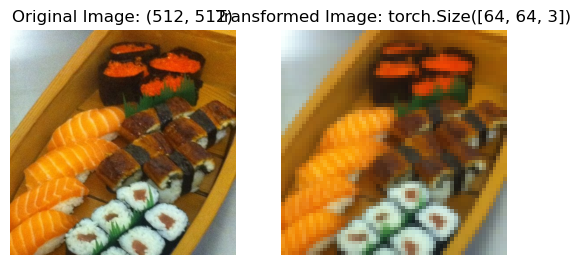

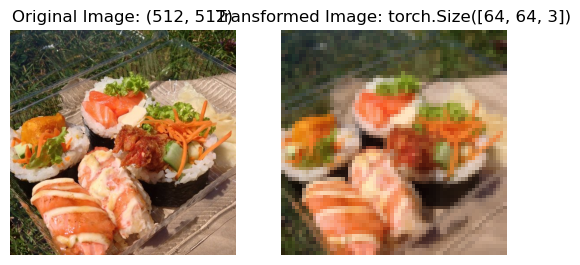

In [14]:
#visualize the transformed image
def plot_transformed_image(image_path,transforms,n=3,seed=None):
   if seed:
       random.seed(seed)
   rand_img_path = random.sample(image_path,k=n)
   for image_path in rand_img_path:
       with Image.open(image_path) as f:
         fig,ax = plt.subplots(nrows=1,ncols=2)
         ax[0].imshow(f)
         ax[0].set_title(f"Original Image: {f.size}")
         ax[0].axis(False)
         transformed_img = transforms(f).permute(1,2,0)
         ax[1].imshow(transformed_img)
         ax[1].set_title(f"Transformed Image: {transformed_img.shape}")
         ax[1].axis(False)          

plot_transformed_image(image_path_list,data_transform,seed=None,n=3)#now u see our image is pixelated becaz we may loss some data wile predicting i made this on intention. 

In [15]:
#use image folder to load image -- option 1
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir, transform=data_transform,target_transform=None)
test_data = datasets.ImageFolder(root=test_dir, transform=data_transform,target_transform=None)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [16]:
#get class names as list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [17]:
len(train_data), len(test_data)

(225, 75)

In [18]:
###visualize the loaded img in trai data
img,label = train_data[0][0],train_data[0][1]
print(img)
print(img.shape)
print(img.dtype)
print(label)
print(class_names[label])
print(type(img))

tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
         [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
         [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
         ...,
         [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
         [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0902],
         [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],

        [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
         [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0745],
         [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
         ...,
         [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
         [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
         [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],

        [[0.0196, 0.0196, 0.0157,  ..., 0.0902, 0.0902, 0.0941],
         [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
         [0.0196, 0.0157, 0.0157,  ..., 0.0902, 0.0902, 0.

original shape: torch.Size([3, 64, 64]) -> permuted shape: torch.Size([64, 64, 3])


Text(0.5, 1.0, 'Image label: pizza')

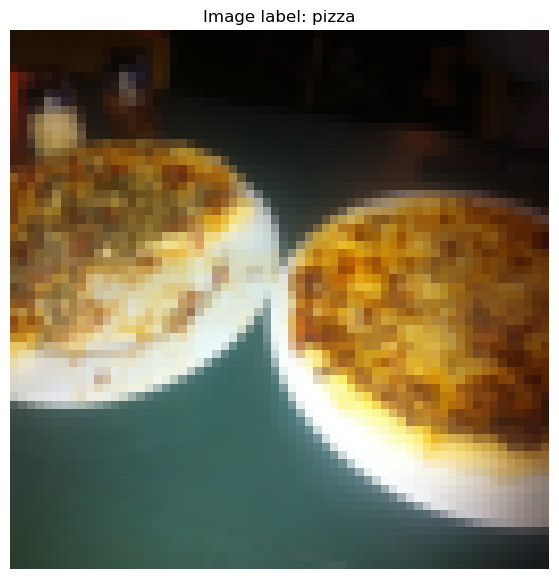

In [19]:
#rearrange the dimensions
img_permute = img.permute(1, 2, 0)  # Change from (C, H, W) to (H, W, C)

print(f"original shape: {img.shape} -> permuted shape: {img_permute.shape}")

plt.figure(figsize=(10, 7))
plt.imshow(img_permute)
plt.axis("off")
plt.title(f"Image label: {class_names[label]}")

In [20]:
#datasets into data loader(data loader turns our datasets int dataloader)
train_dataloader = DataLoader(train_data, batch_size=1, shuffle=True,num_workers=1)
test_dataloader = DataLoader(test_data, batch_size=1, shuffle=False,num_workers=1)
train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f2038d2ae40>,
 <torch.utils.data.dataloader.DataLoader at 0x7f2038bcd810>)

In [21]:
len(train_dataloader), len(test_dataloader)

(225, 75)

In [22]:
img,label = next(iter(train_dataloader))
print(img.shape)
print(label.shape)

torch.Size([1, 3, 64, 64])
torch.Size([1])


In [23]:
##loading dataset with custom dataset
import os
import pathlib
from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple,List,Dict

In [24]:
#instance of torch.utils.datasets.Imagefolder()
train_data.class_to_idx,train_data.classes

({'pizza': 0, 'steak': 1, 'sushi': 2}, ['pizza', 'steak', 'sushi'])

In [25]:
#creating a helper function to get class names in directory
#setup path for target directory
target_directory = train_dir
print(target_directory)

classnames_found = sorted([entry.name for entry in list(os.scandir(target_directory))])
classnames_found

data/pizza_steak_sushi/train


['pizza', 'steak', 'sushi']

In [26]:
def find_classes(directory:str) -> Tuple[List[str],Dict[str,int]]:
    classes = sorted(entry.name for entry in os.scandir(target_directory) if entry.is_dir())
    if not classes:
        raise FileNotFoundError("file nt found")
    
    class_to_idx = {class_name: i for i, class_name in enumerate(classes)}
    return classes,class_to_idx
    

In [27]:
find_classes(target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [28]:
#create custom dataset to replicate `image folder`
from torch.utils.data import Dataset

class Imagefoldercustom(Dataset):
    def __init__(self,targ_dir:str,transform=None):
        self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg"))
        self.transform = transform
        self.classes,self.class_to_idx = find_classes(targ_dir)
        
    def load_image(self,index:int):
        image_path = self.paths[index]
        return Image.open(image_path)
    
    def __len__(self) -> int:
        return len(self.paths)
    
    def __getitem__(self, index) -> Tuple[torch.Tensor,int]:
        img = self.load_image(index)
        class_name = self.paths[index].parent.name
        class_idx = self.class_to_idx[class_name]  
        
        if self.transform:
            return self.transform(img),class_idx 
        else:
            return img,class_idx

In [29]:
#create a transform
train_transforms = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])
test_transforms = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

train_transforms,test_transforms

(Compose(
     Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
     RandomHorizontalFlip(p=0.5)
     ToTensor()
 ),
 Compose(
     Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
     RandomHorizontalFlip(p=0.5)
     ToTensor()
 ))

In [30]:
train_data_custom = Imagefoldercustom(targ_dir=train_dir,transform=train_transforms)
test_data_Custom = Imagefoldercustom(targ_dir=test_dir,transform=test_transforms)

In [31]:
train_data_custom,test_data_Custom

(<__main__.Imagefoldercustom at 0x7f2038dc5940>,
 <__main__.Imagefoldercustom at 0x7f2038bcee90>)

In [32]:
# create a function to display rand images
def display_rand_images(dataset:torch.utils.data.Dataset,
                        classes:List[str]=None,
                        n:int =10,
                        seed:int = None,
                        display_shape:bool = True
                        ):
    if n > 10:
        n = 10
        display_shape = False
        print("n shouldnt be larger than 10")
    
    if seed:
        random.seed(seed)
    
    random_samples_idx = random.sample(range(len(dataset)),k =n)
    
    plt.figure(figsize=(16,10))
    
    for i,targ_sample in enumerate(random_samples_idx):
        targ_img,targ_label = dataset[targ_sample][0],dataset[targ_sample][1]
        
        targ_img_adjust = targ_img.permute(1,2,0)
        plt.subplot(1,n,i+1)
        plt.imshow(targ_img_adjust)
        plt.axis("off")
        if classes:
            title = f"classes: {classes[targ_label]}"
            if display_shape:
                title=title + f" shape: {targ_img_adjust.shape}"
        plt.title(title)

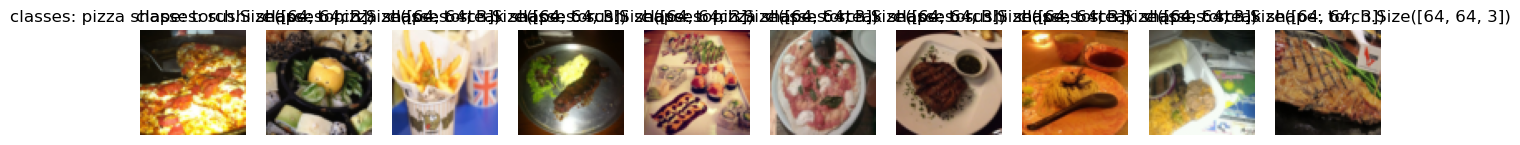

In [33]:
display_rand_images(train_data,n=10,classes=class_names,seed =None)

n shouldnt be larger than 10


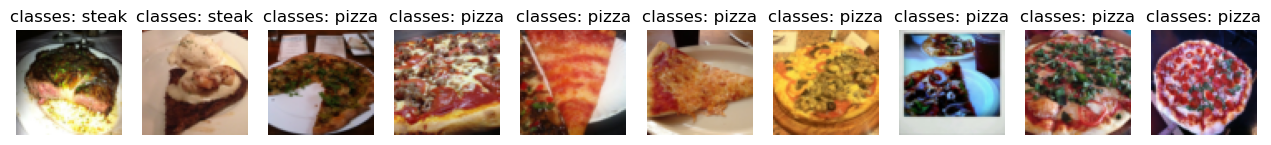

In [34]:
display_rand_images(train_data_custom,n=20,classes=class_names,seed=None)

In [35]:
# turn our custom dataset into dataloaders

train_dataloader_custom = DataLoader(train_data_custom, batch_size=32, shuffle=True, num_workers=os.cpu_count())
test_dataloader_custom = DataLoader(test_data_Custom, batch_size=32, shuffle=False, num_workers=os.cpu_count())

train_dataloader_custom, test_dataloader_custom


(<torch.utils.data.dataloader.DataLoader at 0x7f201be57d90>,
 <torch.utils.data.dataloader.DataLoader at 0x7f2038d5eea0>)

In [36]:
img_custom,label_custom = next(iter(train_dataloader_custom))
img_custom.shape,label_custom.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [37]:
#augumentation
#trivial augumentation
train_transform = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.ToTensor()
])

In [38]:
#get all img path
image_path_list = list(image_path.glob("*/*/*.jpg"))
image_path_list

[PosixPath('data/pizza_steak_sushi/test/steak/354513.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/1302563.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/673127.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/100274.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/502076.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/3873283.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/296375.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/1285886.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/1016217.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/3424937.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/2117351.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/966174.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/1882831.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/690177.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/27415.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/894825.jpg'),
 PosixPath('data/pizza_steak_sushi

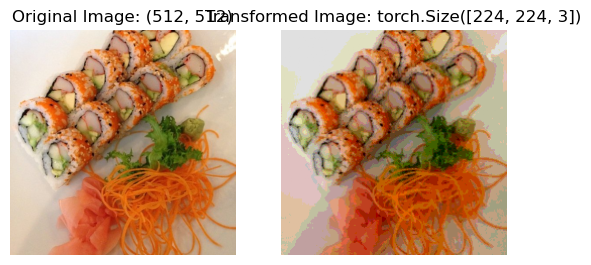

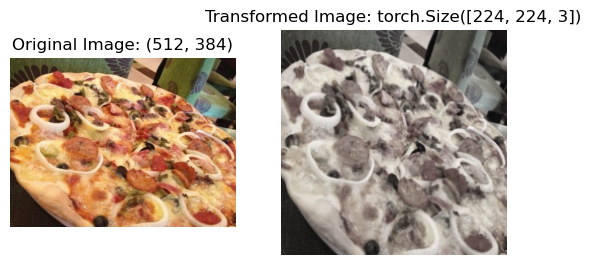

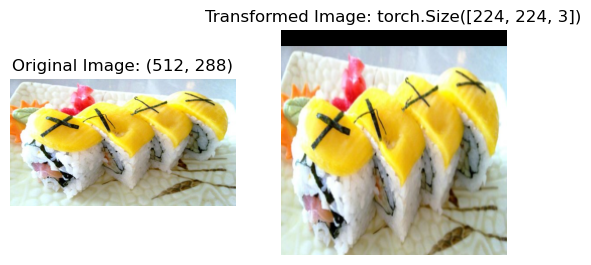

In [39]:
#random transform
plot_transformed_image(image_path=image_path_list,transforms=train_transform,n=3,seed=None)

In [40]:
#building the baseline model (load and transform)
#create transform and load data
simple_transform  = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.ToTensor()
])

In [41]:
from torchvision import datasets

train_data_simple = datasets.ImageFolder(root=train_dir,transform=simple_transform)
test_data_simple = datasets.ImageFolder(root=test_dir,transform=simple_transform)

#dataset into loader

import os
from torch.utils.data import DataLoader  # Fixed the class name

train_dataloader_simple = DataLoader(dataset=train_data_simple,batch_size=32,shuffle=True,num_workers=os.cpu_count())

test_dataloader_simple = DataLoader(dataset=test_data_simple,batch_size=32,shuffle=False,num_workers=os.cpu_count())



In [42]:
#model(tinyvgg arch)
class tinyvgg(nn.Module):
    def __init__(self,input:int,hidden:int,output:int)->None:
        super().__init__()
        self.conv_block1 = nn.Sequential(
             nn.Conv2d(input,hidden,kernel_size=3,stride=1,padding=0),
             nn.ReLU(),
             nn.Conv2d(hidden,hidden,kernel_size=3,stride=1,padding=0),
             nn.ReLU(),
             nn.MaxPool2d(kernel_size=2,stride=2)
             )
        self.conv_block2 = nn.Sequential(
             nn.Conv2d(hidden,hidden,kernel_size=3,stride=1,padding=0),
             nn.ReLU(),
             nn.Conv2d(hidden,hidden,kernel_size=3,stride=1,padding=0),
             nn.ReLU(),
             nn.MaxPool2d(kernel_size=2,stride=2)
             )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden*53*53,out_features=output)   
        )
    def forward(self, x):
        x = self.conv_block1(x)
        x = self.conv_block2(x)
        print(x.shape)  # 👈 See the shape before flattening
        x = x.view(x.size(0), -1)  # flatten
        x = self.classifier(x)
        return x

In [43]:
torch.manual_seed(42)
model1 = tinyvgg(input=3,hidden=10,output=len(class_names)).to(device)
model1

tinyvgg(
  (conv_block1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=28090, out_features=3, bias=True)
  )
)

In [44]:
image_batch,label_batch = next(iter(train_dataloader_simple))
image_batch.shape,label_batch.shape

(torch.Size([32, 3, 224, 224]), torch.Size([32]))

In [45]:
#try forward pass on single image
model1(image_batch.to(device))

torch.Size([32, 10, 53, 53])


tensor([[ 0.0351,  0.0035, -0.0037],
        [ 0.0401, -0.0002, -0.0068],
        [ 0.0352,  0.0008, -0.0047],
        [ 0.0360, -0.0024, -0.0052],
        [ 0.0345,  0.0059, -0.0034],
        [ 0.0421,  0.0064, -0.0071],
        [ 0.0379,  0.0057, -0.0015],
        [ 0.0321,  0.0023, -0.0027],
        [ 0.0340,  0.0024, -0.0014],
        [ 0.0383,  0.0038, -0.0048],
        [ 0.0356,  0.0027, -0.0047],
        [ 0.0371,  0.0039, -0.0055],
        [ 0.0374,  0.0071, -0.0031],
        [ 0.0340,  0.0070, -0.0039],
        [ 0.0379,  0.0030, -0.0059],
        [ 0.0379,  0.0045, -0.0057],
        [ 0.0373,  0.0062, -0.0065],
        [ 0.0374,  0.0024, -0.0042],
        [ 0.0346,  0.0045, -0.0023],
        [ 0.0369,  0.0051, -0.0073],
        [ 0.0330,  0.0049, -0.0021],
        [ 0.0301,  0.0041, -0.0038],
        [ 0.0400,  0.0064, -0.0047],
        [ 0.0398,  0.0081, -0.0045],
        [ 0.0323,  0.0031, -0.0042],
        [ 0.0378,  0.0067, -0.0056],
        [ 0.0376,  0.0072, -0.0042],
 

In [46]:
#using torchinfo to get the summary of our model
import torchinfo
from torchinfo import summary
summary(model1,input_size=[1,3,224,224])

torch.Size([1, 10, 53, 53])


Layer (type:depth-idx)                   Output Shape              Param #
tinyvgg                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 110, 110]         --
│    └─Conv2d: 2-1                       [1, 10, 222, 222]         280
│    └─ReLU: 2-2                         [1, 10, 222, 222]         --
│    └─Conv2d: 2-3                       [1, 10, 220, 220]         910
│    └─ReLU: 2-4                         [1, 10, 220, 220]         --
│    └─MaxPool2d: 2-5                    [1, 10, 110, 110]         --
├─Sequential: 1-2                        [1, 10, 53, 53]           --
│    └─Conv2d: 2-6                       [1, 10, 108, 108]         910
│    └─ReLU: 2-7                         [1, 10, 108, 108]         --
│    └─Conv2d: 2-8                       [1, 10, 106, 106]         910
│    └─ReLU: 2-9                         [1, 10, 106, 106]         --
│    └─MaxPool2d: 2-10                   [1, 10, 53, 53]           --
├─Sequentia

In [47]:
#create train and test loop(using train_step and test_step function)
import torch.optim.optimizer


def train_step(
    model:torch.nn.Module,
    dataloader:torch.utils.data.DataLoader,
    loss_fn:torch.nn.Module,
    optimizer:torch.optim.Optimizer,
    device=device
):
    model.train()
    train_loss,train_acc =0,0
    for batch,(x,y) in enumerate(dataloader):
        x,y=x.to(device),y.to(device)
        
        y_pred = model(x)
        loss = loss_fn(y_pred,y)
        train_loss += loss.item()
        optimizer.zero_grad()
        loss.backward()
        
        optimizer.step()
        y_pred_class = torch.argmax(torch.softmax(y_pred,dim=1),dim=1)
        train_acc+=(y_pred_class==y).sum().item()/len(y_pred)
        
        #adjust metrics to get avg loss and acc
        train_loss = train_loss/len(dataloader)
        train_acc = train_acc/len(dataloader)
        return train_loss,train_acc


In [48]:
def test_step(
    model:torch.nn.Module,
    dataloader:torch.utils.data.DataLoader,
    loss_fn:torch.nn.Module,
    device=device
):
    model.eval()
  
    test_loss,test_acc =0,0
    
    with torch.inference_mode():
        for batch,(x,y) in enumerate(dataloader):
            x,y=x.to(device),y.to(device)
        
            test_pred_logits = model(x)
            loss = loss_fn(test_pred_logits,y)
            test_loss += loss.item()
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc+=(test_pred_labels==y).sum().item()/len(test_pred_labels)
                  
           
            
           
        
            #adjust metrics to get avg loss and acc
            test_loss = test_loss/len(dataloader)
            test_acc = test_acc/len(dataloader)
            return test_loss,test_acc

In [70]:
#create train function to evaluate our model(this function will combine the train step func and test step funct)
from tqdm.auto import tqdm

def train(model:torch.nn.Module,
          train_dataloader:torch.utils.data.DataLoader,
          test_dataloader:torch.utils.data.DataLoader,
          optimizer:torch.optim.Optimizer,
          loss_fn:torch.nn.Module=nn.CrossEntropyLoss(),
          epochs:int =5,
          device=device
          ):
# create a empty result dictinary
    result = {
    "train_loss": [],
    "train_acc": [],
    "test_loss": [],
    "test_acc": []
}

    for epoch in tqdm(range(epochs)):
        train_loss,train_acc = train_step(model=model,
                                      dataloader=train_dataloader,
                                      loss_fn=loss_fn,
                                      optimizer=optimizer,
                                      device=device)
        test_loss,test_acc = test_step(model=model,
                                   dataloader=test_dataloader,
                                   loss_fn=loss_fn,
                                   device=device 
                                   )
    #print whats happening
        print(f"epoch:{epoch}|train loss :{train_loss:4f}|train acc:{train_acc:4f} | test loss :{test_loss:4f} | test acc : {test_acc:4f}")
        # BEGIN: Update result dictionary
        result["train_loss"].append(train_loss)
        result["train_acc"].append(train_acc)
        result["test_loss"].append(test_loss)
        result["test_acc"].append(test_acc)
        # END: Update result dictionary
    return result

In [71]:
#training and evaluating the model with our training function
torch.manual_seed(42)
torch.cuda.manual_seed(42)
epochs = 5
model1 = tinyvgg(input=3,hidden=10,output=len(train_data.classes)).to(device)
loss_fn = nn.CrossEntropyLoss()
Optimizer= torch.optim.Adam(params=model1.parameters(),lr=0.001)
from timeit import default_timer as timer
start_time=timer()

#train model1
model1_result = train(model=model1,train_dataloader=train_dataloader_simple,test_dataloader=test_dataloader_simple,
                      optimizer=Optimizer,loss_fn=loss_fn,epochs=epochs)
end_timer = timer()
print(f"total training time: {end_timer-start_time:3f} seconds")


  0%|          | 0/5 [00:00<?, ?it/s]

torch.Size([32, 10, 53, 53])


 20%|██        | 1/5 [00:01<00:06,  1.56s/it]

torch.Size([32, 10, 53, 53])
epoch:0|train loss :0.137502|train acc:0.035156 | test loss :0.784586 | test acc : 0.072917
torch.Size([32, 10, 53, 53])


 40%|████      | 2/5 [00:03<00:04,  1.50s/it]

torch.Size([32, 10, 53, 53])
epoch:1|train loss :0.174904|train acc:0.054688 | test loss :0.531970 | test acc : 0.072917
torch.Size([32, 10, 53, 53])


 60%|██████    | 3/5 [00:04<00:02,  1.40s/it]

torch.Size([32, 10, 53, 53])
epoch:2|train loss :0.144259|train acc:0.054688 | test loss :0.308919 | test acc : 0.114583
torch.Size([32, 10, 53, 53])


 80%|████████  | 4/5 [00:05<00:01,  1.38s/it]

torch.Size([32, 10, 53, 53])
epoch:3|train loss :0.143116|train acc:0.054688 | test loss :0.251063 | test acc : 0.260417
torch.Size([32, 10, 53, 53])


100%|██████████| 5/5 [00:06<00:00,  1.39s/it]

torch.Size([32, 10, 53, 53])
epoch:4|train loss :0.143116|train acc:0.050781 | test loss :0.258695 | test acc : 0.260417
total training time: 6.969222 seconds


#loss curve

In [72]:
model1_result.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [73]:
def plot_loss_curves(results):
    loss = results["train_loss"]
    accuracy = results["train_acc"]
    test_accuracy = results["test_acc"]
    
    epochs = range(len(loss))  # Make sure this matches the length of your data
    
    plt.figure(figsize=(12, 5))
    
    # Plot Loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label="train_loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.legend()

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label="train_acc")
    plt.plot(epochs, test_accuracy, label="test_acc")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.legend()

    plt.show()


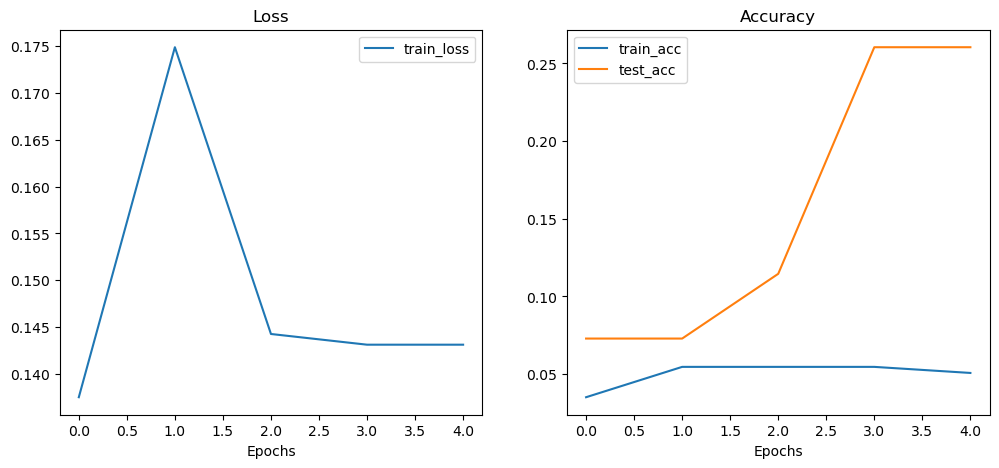

In [74]:
plot_loss_curves(model1_result)

In [69]:
print(result.keys())
print(f"train_loss: {results['train_loss']}")
print(f"test_loss: {results['test_loss']}")
print(f"train_acc: {results['train_acc']}")
print(f"test_acc: {results['test_acc']}")

NameError: name 'result' is not defined